##  5장 GAN에 의한 화상 생성의 준비 파일

- 5장에서 사용하는 폴더를 작성하고 파일 다운로드를 수행합니다.

In [1]:
import os
import urllib.request
import zipfile
import tarfile

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [2]:
# data 폴더가 없으면 작성한다
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [3]:
import sklearn
print(sklearn.__version__)

0.22.1


In [4]:
# AWS의 AMI에서 sklern의 version이 0.20보다 낮은 경우에는 버전을 업데이트합니다
# pip install -U scikit-learn

In [5]:
# MNIST의 필기체 숫자 화상을 다운로드하여 읽습니다(2분 정도 걸립니다)
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home="./data/")  
# data_home으로 저장 위치를 지정합니다


In [6]:
# 데이터 꺼내기
X = mnist.data
y = mnist.target


이 화상 데이터의 라벨은 5입니다


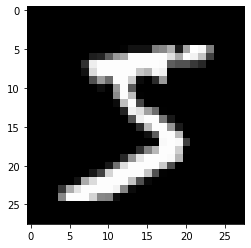

In [7]:
# MNIST의 데이터 첫 번째를 시각화
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 화상 데이터의 라벨은 {}입니다".format(y[0]))

In [8]:
# "data" 폴더의 아래에 "img_78" 폴더를 작성한다
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [9]:
# MNIST에서 숫자7, 8의 화상만 "img_78" 폴더에 화상으로 저장해 나간다
count7=0
count8=0
max_num=200  # 화상은 200장씩 작성한다

for i in range(len(X)):
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count8+=1 



끝